In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

# Método Leapfrog
$$\vec(a)(t) = F(x(t))$$
$$\vec{v}_{n + 1/2} = \vec{v}_{n - 1/2} + \vec{a}(x_n)\Delta t$$
$$\vec(r)_{n+1} = \vec{r}_n + \vec{v}_{n + 1/2}\Delta t$$
$$\vec(r)(t + \Delta t) = \vec{r}(t) + \vec{v}(t + \Delta t/2)\Delta t $$
Para iniciar el método necesitamos $\vec{v}_{-1/2}$, el cual lo podemos inicializar con el método de Euler.
$$\vec{v}_{-1/2} = \vec{v}_0 - \Delta t/2\vec{a}(0)$$
# Resolvamos el siguiente sistema
$$\frac{d^2 x}{dt^2} + \pi^2x = 0$$
Con condiciones iniciales,
$$x(0) = 1, \dot{x}(0) = 0$$

In [2]:
Tmin, Tmax, Npoints = 0.0, 10.0, 501
t = np.linspace(Tmin, Tmax, Npoints)
deltat = (Tmax - Tmin)/float(Npoints - 1)
print(deltat, t.shape)
print(t)

0.02 (501,)
[ 0.    0.02  0.04  0.06  0.08  0.1   0.12  0.14  0.16  0.18  0.2   0.22
  0.24  0.26  0.28  0.3   0.32  0.34  0.36  0.38  0.4   0.42  0.44  0.46
  0.48  0.5   0.52  0.54  0.56  0.58  0.6   0.62  0.64  0.66  0.68  0.7
  0.72  0.74  0.76  0.78  0.8   0.82  0.84  0.86  0.88  0.9   0.92  0.94
  0.96  0.98  1.    1.02  1.04  1.06  1.08  1.1   1.12  1.14  1.16  1.18
  1.2   1.22  1.24  1.26  1.28  1.3   1.32  1.34  1.36  1.38  1.4   1.42
  1.44  1.46  1.48  1.5   1.52  1.54  1.56  1.58  1.6   1.62  1.64  1.66
  1.68  1.7   1.72  1.74  1.76  1.78  1.8   1.82  1.84  1.86  1.88  1.9
  1.92  1.94  1.96  1.98  2.    2.02  2.04  2.06  2.08  2.1   2.12  2.14
  2.16  2.18  2.2   2.22  2.24  2.26  2.28  2.3   2.32  2.34  2.36  2.38
  2.4   2.42  2.44  2.46  2.48  2.5   2.52  2.54  2.56  2.58  2.6   2.62
  2.64  2.66  2.68  2.7   2.72  2.74  2.76  2.78  2.8   2.82  2.84  2.86
  2.88  2.9   2.92  2.94  2.96  2.98  3.    3.02  3.04  3.06  3.08  3.1
  3.12  3.14  3.16  3.18  3.2   3.22  3.24

In [3]:
TMin1 = Tmin - 0.5*deltat
TMax1 = Tmax - 0.5*deltat

t1 = np.arange(TMin1, TMax1+deltat, deltat)
print(t1)

[-0.01  0.01  0.03  0.05  0.07  0.09  0.11  0.13  0.15  0.17  0.19  0.21
  0.23  0.25  0.27  0.29  0.31  0.33  0.35  0.37  0.39  0.41  0.43  0.45
  0.47  0.49  0.51  0.53  0.55  0.57  0.59  0.61  0.63  0.65  0.67  0.69
  0.71  0.73  0.75  0.77  0.79  0.81  0.83  0.85  0.87  0.89  0.91  0.93
  0.95  0.97  0.99  1.01  1.03  1.05  1.07  1.09  1.11  1.13  1.15  1.17
  1.19  1.21  1.23  1.25  1.27  1.29  1.31  1.33  1.35  1.37  1.39  1.41
  1.43  1.45  1.47  1.49  1.51  1.53  1.55  1.57  1.59  1.61  1.63  1.65
  1.67  1.69  1.71  1.73  1.75  1.77  1.79  1.81  1.83  1.85  1.87  1.89
  1.91  1.93  1.95  1.97  1.99  2.01  2.03  2.05  2.07  2.09  2.11  2.13
  2.15  2.17  2.19  2.21  2.23  2.25  2.27  2.29  2.31  2.33  2.35  2.37
  2.39  2.41  2.43  2.45  2.47  2.49  2.51  2.53  2.55  2.57  2.59  2.61
  2.63  2.65  2.67  2.69  2.71  2.73  2.75  2.77  2.79  2.81  2.83  2.85
  2.87  2.89  2.91  2.93  2.95  2.97  2.99  3.01  3.03  3.05  3.07  3.09
  3.11  3.13  3.15  3.17  3.19  3.21  3.23  3.25  3

In [4]:
x0 = 1
v0 = 0

def GetA(x, v):
    return -(np.pi)**2*x - v   

x = np.zeros(Npoints)
x[0] = x0
v = np.zeros(Npoints)
v[0] = v0 - 0.5*deltat*GetA(x[0], v0)
print(v[0])

0.09869604401089359


In [5]:
def GetLeapFrog(x,v,deltat):
    print('--- Running Leap-Frog Method ---')
    for i in range(1,Npoints):
        v[i] = v[i-1] + GetA(x[i-1], v[i-1])*deltat
        x[i] = x[i-1] + v[i]*deltat

In [6]:
GetLeapFrog(x,v,deltat)

--- Running Leap-Frog Method ---


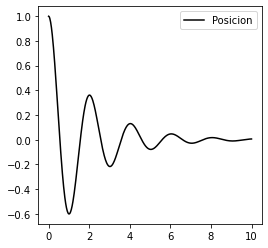

In [7]:
plt.figure(figsize=(4,4))
plt.plot(t,x,c='k', label='Posicion')
plt.legend(loc=0)
plt.show()

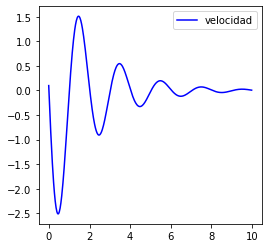

In [8]:
plt.figure(figsize=(4,4))
plt.plot(t1,v, c='b',label='velocidad')
plt.legend(loc=0)
#plt.xlim(-0.05,0.05)
#plt.ylim(-0.05,0.05)
plt.show()

(-4.0, 4.0)

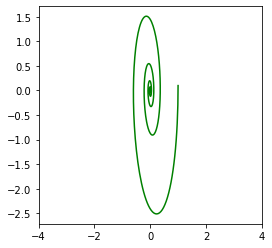

In [9]:
plt.figure(figsize=(4,4))
plt.plot(x,v, c='g',label='phase space')
plt.xlim(-4,4)
plt.xlim(-4,4)

# Método leapfrog
$$ \frac{d^{2}x}{dt^{2}} +x = 0 $$
Con condiciones iniciales:

$$ x(0) = 1, \dot{x}(0) = 0 $$
$$ U = \begin{pmatrix} x \\ \dot{x} \end{pmatrix} $$
Tomemos la derivada de este vector y usemos la ecuacion diferencial:

$$ \frac{dU}{dt} = \begin{pmatrix} \dot{x} \\ -x \end{pmatrix} =  \begin{pmatrix} 0 1 \\ -1 0 \\ \end{pmatrix} \begin{pmatrix} x \\ \dot{x} \end{pmatrix} = AU = F(U)$$
Donde $A$ es la matriz simpléctica del sistema. Usemos el esquema de leapfrog para calcular la evolución del sistema.

$$ U^{n+1} = U^{n-1} + 2\Delta t F(U^{n})$$
Para poder arrancar método necestiamos el esquema de un paso (Euler explícito).

$$ U^{n+1} = U^{n} + \Delta t F(U^{n})$$
dado que tenemos $ U^{0} $

$$ U^{0} = \begin{pmatrix} 1 \\ 0 \end{pmatrix} $$

In [10]:
# Primero implementamos la estructura simplectica
A = np.array([[0,1],[-1,0]])
print(A)

[[ 0  1]
 [-1  0]]


In [11]:
# Definamos la fuerza
def F(t, U):
    return A @ U

In [12]:
#Discretizamos el tiempo
Tmin, Tmax, Npoints = 0.,20., 50
t = np.linspace(Tmin, Tmax, Npoints)
deltat = (Tmax-Tmin)/float(Npoints-1)
print(deltat)

# Posicion
x=np.zeros(Npoints)
x[0] = 1.


0.40816326530612246


In [22]:
# Velocidad
v=np.zeros(Npoints)
v[0] = 0.0

In [23]:
Un0 = np.array([x[0], v[0]])
print(Un0)

[1. 0.]


In [24]:
# Definamos un Euler para el primer punto
def GetEuler(t0, u0, F, deltat):
    return u0 + deltat*F(t0,u0)

In [25]:
Un1 = GetEuler(t[0], Un0, F, deltat)
print(Un1)

[ 1.         -0.40816327]


In [26]:
x[1] = Un1[0]
v[1] = Un1[1]

In [27]:
#Implementemos leapfrog matricial
def GetMLeapFrog(t, u0, u1, F, deltat):
    return u0 + 2.0*deltat*F(t,u1)

In [28]:
Un2 = GetMLeapFrog(t[1], Un0, Un1, F, deltat)
print(Un2)

[ 0.6668055  -0.81632653]


In [29]:
# Iterar sobre los demas puntos

for i in range(2, Npoints):
    Un0 = Un1
    Un1 = Un2
    Un2 = GetMLeapFrog(t[i-1], Un0, Un1, F, deltat)
    x[i] = Un2[0]
    v[i] = Un2[1]

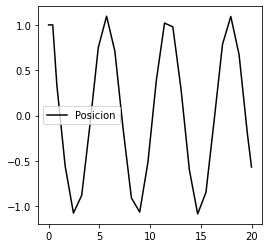

In [30]:
plt.figure(figsize=(4,4))
plt.plot(t,x, c='k',label='Posicion')
plt.legend(loc=0)
plt.show()

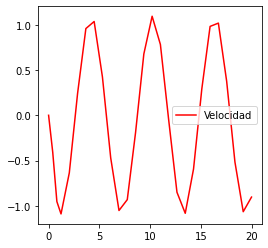

In [31]:
plt.figure(figsize=(4,4))
plt.plot(t,v, c='r',label='Velocidad')
plt.legend(loc=0)
plt.show()

# ¿Cuál es la oferta de Python?

In [35]:
import sympy

x = sympy.Symbol('x')
y = sympy.Function('y')

#Escribir la ecuacion
f = 6*x**2 - 3*x**2*(y(x))
sympy.Eq(y(x).diff(x) - f, 0)

Eq(3*x**2*y(x) - 6*x**2 + Derivative(y(x), x), 0)

In [36]:
#Resolver la ecuacion
sympy.dsolve(y(x).diff(x) - f)

Eq(y(x), C1*exp(-x**3) + 2)

In [37]:
#Otras formas de la ecuacion
eq = 0.5*y(x)**2

#Condiciones iniciales
ics = {y(0):2}

edo = sympy.dsolve(y(x).diff(x)-eq)
print(edo)

Eq(y(x), -1/(C1 + 0.5*x))


In [39]:
C = sympy.Eq(edo.lhs.subs(x,0).subs(ics),edo.rhs.subs(x,0))
print(C)

Eq(2, -1/C1)


In [40]:
sympy.solve(C)

[-1/2]

# Atractor de Lorentz 
$$x'(t) = \sigma(y-x)$$
$$y'(t) = x(\rho - z) - y$$
$$z'(t) = xy - \beta z$$

In [54]:
# Definimos el sistema de ecuaciones
from scipy import integrate

def f(xyz, t, sigma, rho, beta):
    x,y,z = xyz
    return[sigma*(y-x), x*(rho-z) - y, x*y - beta*z]

In [55]:
# Asignamos los valores a los parametros
sigma, rho, beta = 8.0, 99.96, 8.0/3.0

In [56]:
xyz0 = [1.0,1.0,1.0]
t = np.linspace(0, 100, 100000)
xyz = integrate.odeint(f, xyz0, t, args=(sigma, rho, beta))

In [57]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

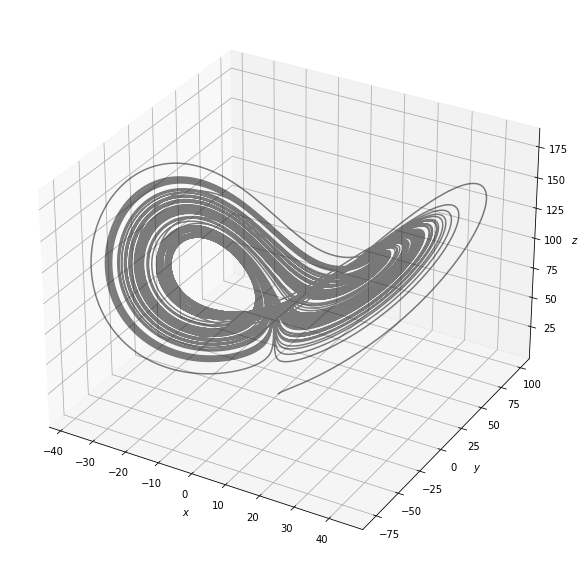

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(10, 15), subplot_kw={'projection':'3d'})
ax.plot(xyz[:,0],xyz[:,1],xyz[:,2], c='k', alpha=0.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.show()